<a href="https://colab.research.google.com/github/pintu1803/DL/blob/main/fake_news_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection Using CNN

Mount Google Drive

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

# Load and split the data

In [12]:
#22/03/2021
#Pintu
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd

train_raw_data=pd.read_csv('/content/drive/MyDrive/fake-news/train.csv')
train_raw_data=train_raw_data.dropna()

x=train_raw_data['text'].values
y=train_raw_data['label'].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1000)


# Build Vocabulary 

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer                    
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

maxlen = 100

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

Confirm that text is converted into vector.

In [14]:
print(type(x_train))
for row in x_train:
  print(row)
  break

<class 'numpy.ndarray'>
[  483  4504 15579  5486     4  8301  9912   338    11  4730     4    45
  2225   145 42938   263    15   116  5018     1  2339    35     9     5
   219   954    19   274    35     2     1   596    11     1   117  1399
  1451    62    40   338  2258   926  4791  5844     1   133   126   486
   361 23497   152  1000    32   266    55    68   122  1049     2   755
     1   739   948    42    22   706     3    50   367     1   147    32
    20   984  2208     2   148     1    89   990  6297   517     9     1
    91    78    10    23  5844   278   129  1864     1    68    42    22
    45     3    71    10]


# Download the GloVe: For embedding

In [6]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-03-21 19:13:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-21 19:13:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-21 19:13:28--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

# Unzip the zip folder of GloVe

In [7]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [8]:
# !ls
# !pwd

drive		   glove.6B.200d.txt  glove.6B.50d.txt	sample_data
glove.6B.100d.txt  glove.6B.300d.txt  glove.6B.zip
/content


# Create embedding matrix using GloVe

In [15]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
  
    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/glove.6B.300d.txt',
                                            tokenizer.word_index,  
                                            embedding_dim)

# Build CNN model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=10)
model.summary()

Epoch 1/10
1372/1372 [==============================] - 258s 164ms/step - loss: 0.3753 - accuracy: 0.7985 - val_loss: 0.1852 - val_accuracy: 0.9243
Epoch 2/10
1372/1372 [==============================] - 224s 163ms/step - loss: 0.0652 - accuracy: 0.9778 - val_loss: 0.2212 - val_accuracy: 0.9134
Epoch 3/10
1372/1372 [==============================] - 224s 163ms/step - loss: 0.0064 - accuracy: 0.9993 - val_loss: 0.2459 - val_accuracy: 0.9232
Epoch 4/10
1372/1372 [==============================] - 224s 163ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.2685 - val_accuracy: 0.9241
Epoch 5/10
1372/1372 [==============================] - 224s 163ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.2830 - val_accuracy: 0.9248
Epoch 6/10
1372/1372 [==============================] - 224s 163ms/step - loss: 5.8763e-05 - accuracy: 1.0000 - val_loss: 0.2965 - val_accuracy: 0.9217
Epoch 7/10
1372/1372 [==============================] - 225s 164ms/step - loss: 5.8099e-04 - accuracy: 0.999

# Evaluate the model

In [18]:
val_loss, val_acc=model.evaluate(x_test, y_test)

143/143 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.9234


# Prediction and performance measure of model

In [26]:
from math import floor
from sklearn.metrics import classification_report, confusion_matrix

y_pred=model.predict(x_test)
# print(y_pred[0])
y_pred=[1 if x>=0.5 else 0 for x in y_pred]
# print(y_pred[0])
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)

print("Confusion matrix=\n",cm)
print("Classification report=\n",cr)

Confusion matrix=
 [[2386  179]
 [ 171 1836]]
Classification report=
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2565
           1       0.91      0.91      0.91      2007

    accuracy                           0.92      4572
   macro avg       0.92      0.92      0.92      4572
weighted avg       0.92      0.92      0.92      4572



This is purely CNN model. It took approx. 38 minutes to run the 10 epochs.

Note that if you rerun the .fit() method, you’ll start off with the computed weights from the previous training. Make sure to call clear_session() before you start training the model again:

In [ ]:
# from keras.backend import clear_session
# clear_session()

Now let’s evaluate the accuracy of the model:

In [27]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))#overfitting.
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))#actual accuracy

Training Accuracy: 0.9999
Testing Accuracy:  0.9234


Visualize the loss and accuracy for the training and testing data based on the History callback.

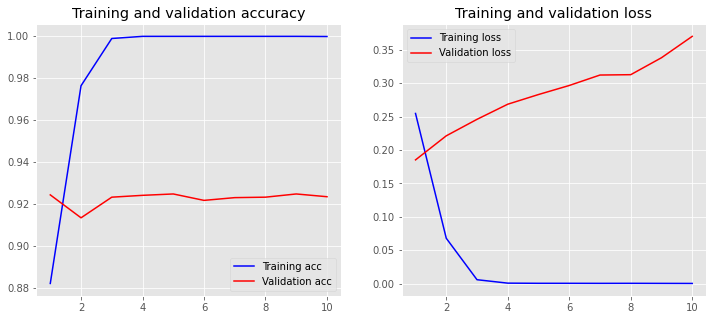

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


#call the function using history
plot_history(history)

WE can see that we have trained our model for too long since the training set reached 100% accuracy. A good way to see when the model starts overfitting is when the loss of the validation data starts rising again. This tends to be a good point to stop the model. You can see this around 20-40 epochs in this training.

Note: When training neural networks, you should use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.